# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        time.sleep(1)

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | assiniboia
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | pitimbu
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | carinhanha
Processing Record 14 of Set 1 | marondera
Processing Record 15 of Set 1 | mataram
Processing Record 16 of Set 1 | kemijarvi
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | mattoon
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | husavik
Processing Record 22 of Set 1 | honiara
P

In [4]:
city_data

[{'City': 'assiniboia',
  'Lat': 49.6334,
  'Lng': -105.9845,
  'Max Temp': 295.05,
  'Humidity': 30,
  'Cloudiness': 14,
  'Wind Speed': 2.57,
  'Country': 'CA',
  'Date': 1684103837},
 {'City': 'barrow',
  'Lat': 71.2906,
  'Lng': -156.7887,
  'Max Temp': 276.16,
  'Humidity': 81,
  'Cloudiness': 75,
  'Wind Speed': 11.83,
  'Country': 'US',
  'Date': 1684103724},
 {'City': 'sitka',
  'Lat': 57.0531,
  'Lng': -135.33,
  'Max Temp': 289.09,
  'Humidity': 63,
  'Cloudiness': 75,
  'Wind Speed': 2.57,
  'Country': 'US',
  'Date': 1684103837},
 {'City': 'pitimbu',
  'Lat': -7.4706,
  'Lng': -34.8086,
  'Max Temp': 301.48,
  'Humidity': 78,
  'Cloudiness': 23,
  'Wind Speed': 4.3,
  'Country': 'BR',
  'Date': 1684103657},
 {'City': 'lebu',
  'Lat': -37.6167,
  'Lng': -73.65,
  'Max Temp': 285.71,
  'Humidity': 88,
  'Cloudiness': 97,
  'Wind Speed': 5.69,
  'Country': 'CL',
  'Date': 1684103838},
 {'City': 'port elizabeth',
  'Lat': -33.918,
  'Lng': 25.5701,
  'Max Temp': 286.1,
  'Humid

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,assiniboia,49.6334,-105.9845,295.05,30,14,2.57,CA,1684103837
1,barrow,71.2906,-156.7887,276.16,81,75,11.83,US,1684103724
2,sitka,57.0531,-135.3300,289.09,63,75,2.57,US,1684103837
3,pitimbu,-7.4706,-34.8086,301.48,78,23,4.30,BR,1684103657
4,lebu,-37.6167,-73.6500,285.71,88,97,5.69,CL,1684103838


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/robertzygmuntlehr/Desktop/DataScience/BootCamp/Challenges/Challenge_6/06-Python-APIs/PythonAPIs_Challenge/WeatherPy/output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("/Users/robertzygmuntlehr/Desktop/DataScience/BootCamp/Challenges/Challenge_6/06-Python-APIs/PythonAPIs_Challenge/WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,assiniboia,49.6334,-105.9845,295.05,30,14,2.57,CA,1684103837
1,barrow,71.2906,-156.7887,276.16,81,75,11.83,US,1684103724
2,sitka,57.0531,-135.3300,289.09,63,75,2.57,US,1684103837
3,pitimbu,-7.4706,-34.8086,301.48,78,23,4.30,BR,1684103657
4,lebu,-37.6167,-73.6500,285.71,88,97,5.69,CL,1684103838


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

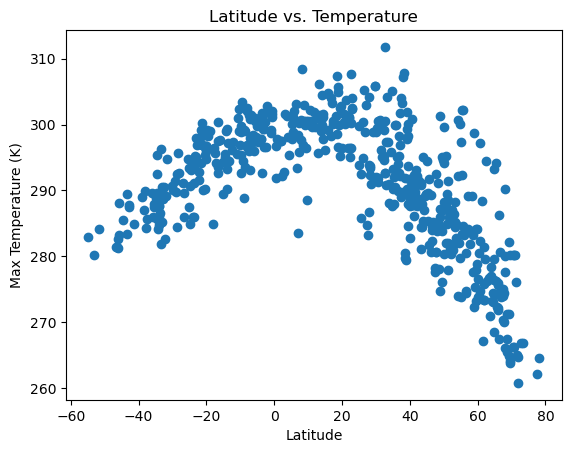

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')

# Save the figure
plt.savefig("/Users/robertzygmuntlehr/Desktop/DataScience/BootCamp/Challenges/Challenge_6/06-Python-APIs/PythonAPIs_Challenge/WeatherPy/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

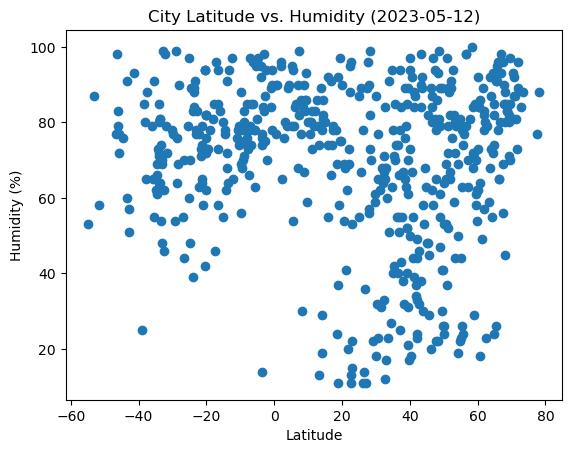

In [10]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-05-12)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("/Users/robertzygmuntlehr/Desktop/DataScience/BootCamp/Challenges/Challenge_6/06-Python-APIs/PythonAPIs_Challenge/WeatherPy/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

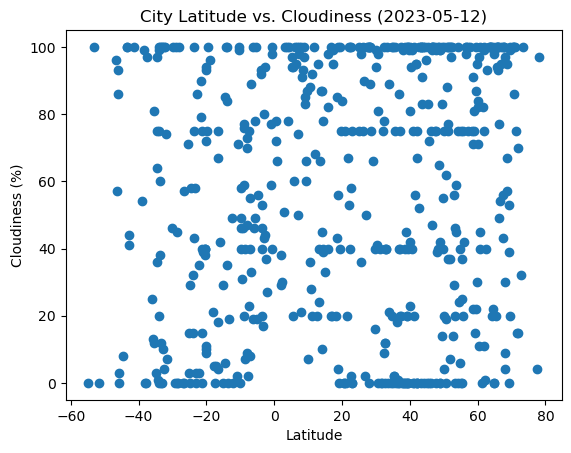

In [11]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-05-12)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("/Users/robertzygmuntlehr/Desktop/DataScience/BootCamp/Challenges/Challenge_6/06-Python-APIs/PythonAPIs_Challenge/WeatherPy/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

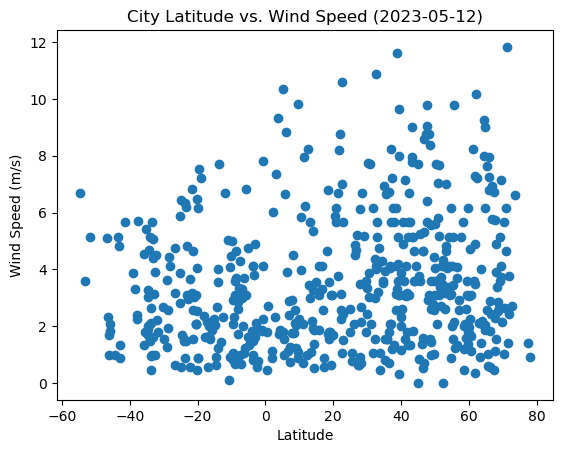

In [12]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-05-12)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("/Users/robertzygmuntlehr/Desktop/DataScience/BootCamp/Challenges/Challenge_6/06-Python-APIs/PythonAPIs_Challenge/WeatherPy/output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


# Remember to add optional paramaters for renaming the axes

In [13]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(parameter_1, parameter_2, text_x=0.05, text_y=0.1):
    slope, intercept = np.polyfit(parameter_1, parameter_2, 1)
    r_value = np.corrcoef(parameter_1, parameter_2)[0, 1]

    plt.scatter(parameter_1, parameter_2)
    regression_line = slope * np.array(parameter_1) + intercept
    plt.plot(parameter_1, regression_line, color='red')

    plt.title('Linear Regression Plot')
    plt.xlabel('X')
    plt.ylabel('Y')

    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(text_x, text_y, equation, ha='left', va='bottom', transform=plt.gca().transAxes, fontsize=14, fontweight='normal', color='red')

    print(f'r-value: {r_value:.2f}')

    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
df_northern_hemisphere = city_data_df[city_data_df['Lat']>=0]

# Display sample data
df_northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,assiniboia,49.6334,-105.9845,295.05,30,14,2.57,CA,1684103837
1,barrow,71.2906,-156.7887,276.16,81,75,11.83,US,1684103724
2,sitka,57.0531,-135.3300,289.09,63,75,2.57,US,1684103837
6,qaanaaq,77.4840,-69.3632,262.10,77,4,1.39,GL,1684103838
7,victoria,22.2855,114.1577,296.45,95,100,3.14,HK,1684103587


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
df_southern_hemisphere = city_data_df[city_data_df['Lat']<0]

# Display sample data
df_southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,pitimbu,-7.4706,-34.8086,301.48,78,23,4.30,BR,1684103657
4,lebu,-37.6167,-73.6500,285.71,88,97,5.69,CL,1684103838
5,port elizabeth,-33.9180,25.5701,286.10,85,20,2.06,ZA,1684103783
8,mataura,-46.1927,168.8643,281.19,83,93,0.99,NZ,1684103838
10,port alfred,-33.5906,26.8910,286.58,81,60,0.45,ZA,1684103839


###  Temperature vs. Latitude Linear Regression Plot

r-value: -0.79


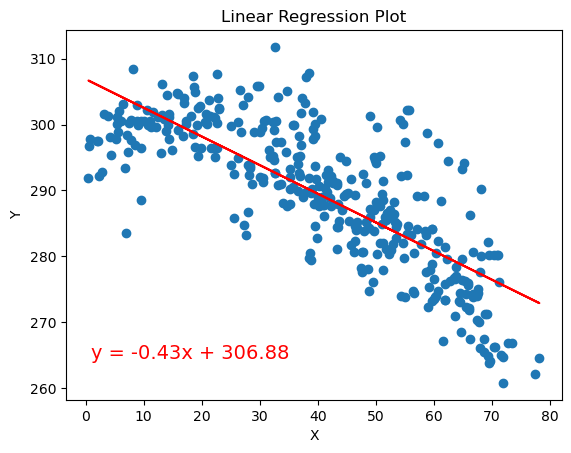

In [24]:
# Linear regression on Northern Hemisphere
x = df_northern_hemisphere['Lat']  # X-axis data (latitude)
y = df_northern_hemisphere['Max Temp']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y)

r-value: 0.83


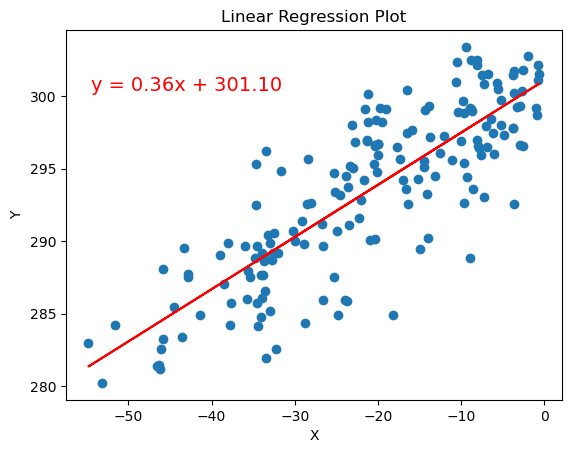

In [25]:
# Linear regression on Southern Hemisphere
x = df_southern_hemisphere['Lat']  # X-axis data (latitude)
y = df_southern_hemisphere['Max Temp']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-value: 0.04


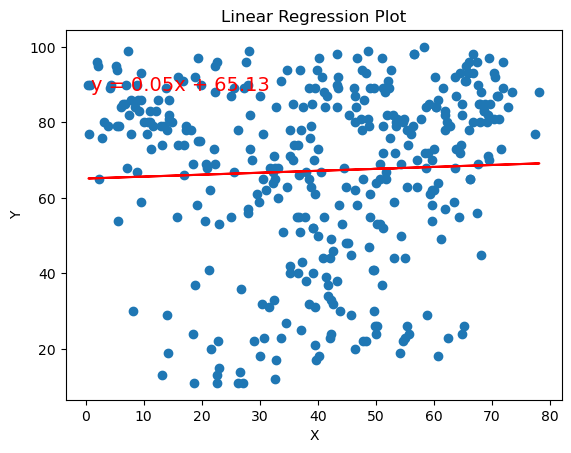

In [26]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x = df_northern_hemisphere['Lat']  # X-axis data (latitude)
y = df_northern_hemisphere['Humidity']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

r-value: 0.21


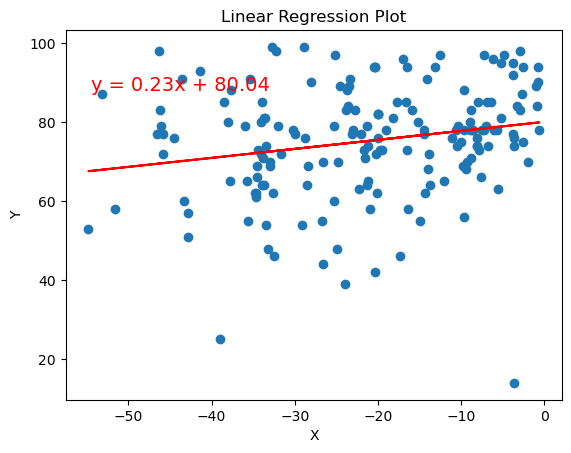

In [27]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x = df_southern_hemisphere['Lat']  # X-axis data (latitude)
y = df_southern_hemisphere['Humidity']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-value: 0.02


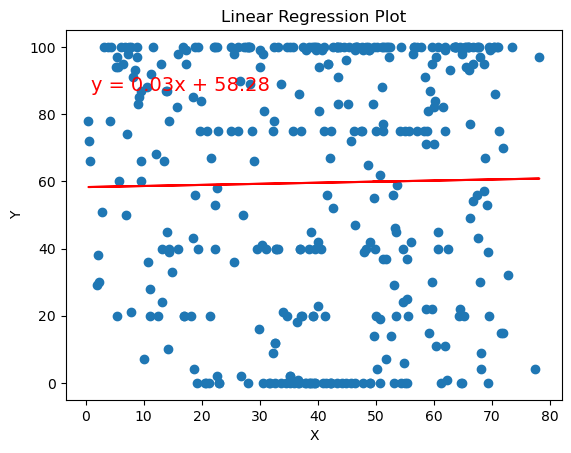

In [29]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x = df_northern_hemisphere['Lat']  # X-axis data (latitude)
y = df_northern_hemisphere['Cloudiness']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

r-value: 0.02


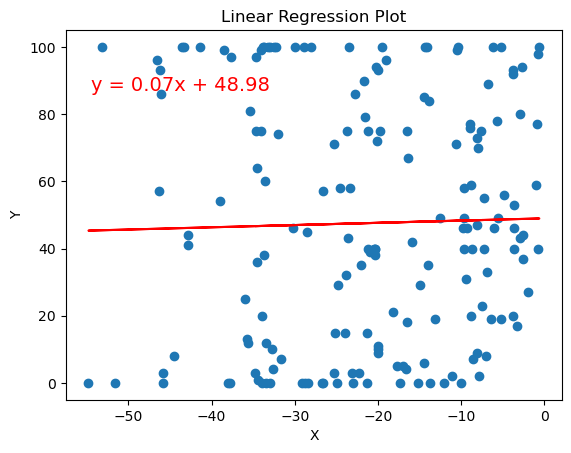

In [30]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x = df_southern_hemisphere['Lat']  # X-axis data (latitude)
y = df_southern_hemisphere['Cloudiness']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-value: 0.07


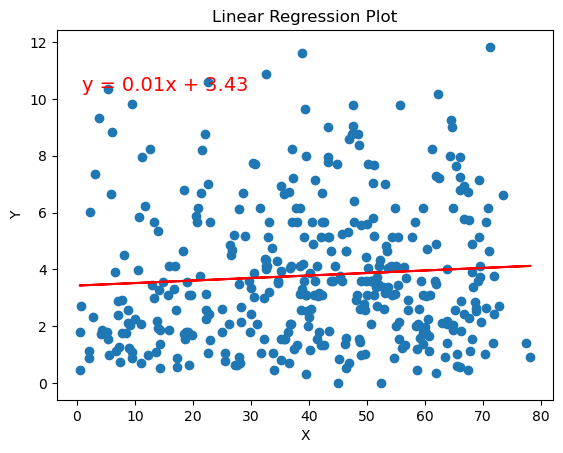

In [32]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x = df_northern_hemisphere['Lat']  # X-axis data (latitude)
y = df_northern_hemisphere['Wind Speed']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

r-value: -0.10


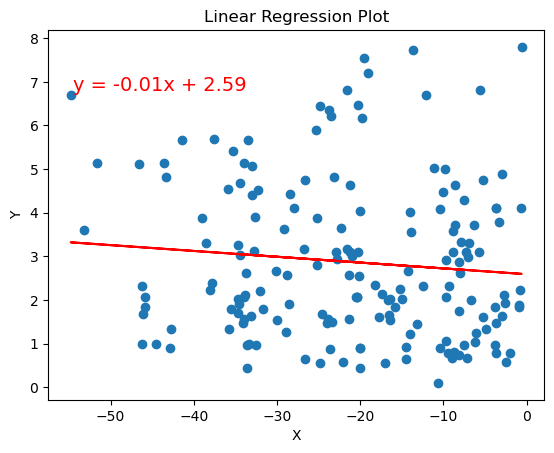

In [33]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x = df_southern_hemisphere['Lat']  # X-axis data (latitude)
y = df_southern_hemisphere['Wind Speed']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

'Twas lovely!